# Data Structures and Algorithms - continued (Cấu trúc dữ liệu và Thuật toán)

Authors: Khanh Vu (UCI), Duc Hoang (MIT), Trinh Chau, Thien Bui, Trung Pham. Adapted from: Google.

# Graph Properties / Thuộc tính của đồ thị

## Lesson Overview  / Tổng quan bài học

> A **node** is a data structure that stores information.

> An **edge** is a data structure that represents the connection between two nodes.

> A **graph** is a data structure that connects nodes to other nodes via a network of edges.

> **Nút (Node)** là một cấu trúc dữ liệu lưu trữ thông tin..

> **Cạnh (Edge)** Là một cấu trúc dữ liệu biểu diễn kết nối giữa hai nút (node).

> **Đồ thị (Graph)** Là một cấu trúc dữ liệu kết nối các nút với nhau thông qua mạng lưới các cạnh.

You can think of a graph as an extension of a linked list or a doubly linked list. In a linked list, the connection between nodes is only ever implicit (via `next`, and `previous` for doubly linked lists). Graphs place no restrictions on the number of edges a node can have. Furthermore, graph edges can also carry additional information about the connection between two nodes. There are many applications of graphs in the real world:

*   Graphs can represent locations (and the roads that connect them).
*   Graphs can represent people (and their friendships / social connections).
*   Graphs can represent the Internet (websites are nodes and links to other websites serve as edges).

Nodes in graphs can even be connected to themselves, which, for instance, might be a website linking to itself via the "Home" button.



Bạn có thể coi đồ thị như một mở rộng của danh sách liên kết (linked list) hoặc danh sách liên kết kép (doubly linked list). Trong danh sách liên kết, kết nối giữa các nút (node) chỉ là ngầm định (thông qua `next`, và `previous` đối với danh sách liên kết kép). Đồ thị không giới hạn số lượng cạnh mà một nút có thể có. Hơn nữa, các cạnh của đồ thị cũng có thể mang thêm thông tin về kết nối giữa hai nút. Có nhiều ứng dụng thực tế của đồ thị:

*   Đồ thị có thể biểu diễn các địa điểm (và các con đường nối giữa chúng).
*   Đồ thị có thể biểu diễn con người (và các mối quan hệ bạn bè/kết nối xã hội).
*   Đồ thị có thể biểu diễn Internet (các trang web là nút và các liên kết đến trang web khác đóng vai trò là cạnh).

Các nút trong đồ thị thậm chí có thể kết nối với chính nó, ví dụ như một trang web liên kết đến chính nó thông qua nút "Trang chủ".

### Graph implementation / Triển khai đồ thị

There are several ways to implement a graph in Python. Some implementations include extra data stored on edges between nodes, such as a **weight** or **cost**. If we don't require that additional data, we can make the edges implicit (rather than explicitly defining an `Edge` class) by storing a reference to a node, rather than a new edge.

Có nhiều cách để triển khai đồ thị trong Python. Một số triển khai bao gồm dữ liệu bổ sung được lưu trữ trên các cạnh giữa các nút, chẳng hạn như **trọng số (weight)** hoặc **chi phí (cost)**. Nếu không yêu cầu dữ liệu bổ sung đó, chúng ta có thể làm cho các cạnh trở nên ngầm định (thay vì định nghĩa rõ ràng một lớp `Edge`) bằng cách lưu trữ tham chiếu đến một nút, thay vì một cạnh mới.

In [1]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in our implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

In [2]:
class Graph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

---

Let's take a look at an example:

Hãy xem một ví dụ:

In [ ]:
node_one = Node(1)
node_two = Node(2)
node_three = Node(3)
node_four = Node(4)
node_five = Node(5)

graph = Graph()
graph.add_node(node_one)
graph.add_node(node_two)
graph.add_node(node_three)
graph.add_node(node_four)
graph.add_node(node_five)

node_one.add_connection(node_four)
node_two.add_connection(node_four)
node_two.add_connection(node_five)
node_four.add_connection(node_five)

graph.print()

This code creates a graph with five nodes, some of which are connected to one or other nodes in the graph.

- Node 1 is connected to node 4
- Node 2 is connected to nodes 4 and 5
- Node 3 is not connected to any other nodes
- Node 4 is connected to nodes 1, 2, and 5
- Node 5 is connected to nodes 2 and 4


Đoạn code này tạo một đồ thị với năm nút, một số trong đó được kết nối với một hoặc nhiều nút khác trong đồ thị.

*   Nút 1 được kết nối với nút 4
*   Nút 2 được kết nối với nút 4 và 5
*   Nút 3 không được kết nối với bất kỳ nút nào khác
*   Nút 4 được kết nối với nút 1, 2 và 5
*   Nút 5 được kết nối với nút 2 và 4


You'll notice node 3 is not connected to any other node; that's fine! It's still part of the graph. There are no restrictions on how many nodes a node should be connected to, nor on how many nodes in a graph, nor on how many edges in a graph.

Bạn sẽ nhận thấy nút 3 không được kết nối với bất kỳ nút nào khác; điều đó hoàn toàn bình thường! Nó vẫn là một phần của đồ thị. Không có giới hạn nào về số lượng nút mà một nút có thể kết nối, cũng như số lượng nút hoặc cạnh trong một đồ thị.


If the text-based representation of the graph is too abstract, try drawing it to see if that helps you visualize how the nodes fit together. You should get a drawing like this:


Nếu biểu diễn đồ thị dưới dạng văn bản quá trừu tượng, hãy thử vẽ nó để hình dung cách các nút kết nối với nhau. Bạn sẽ có một hình vẽ như thế này:


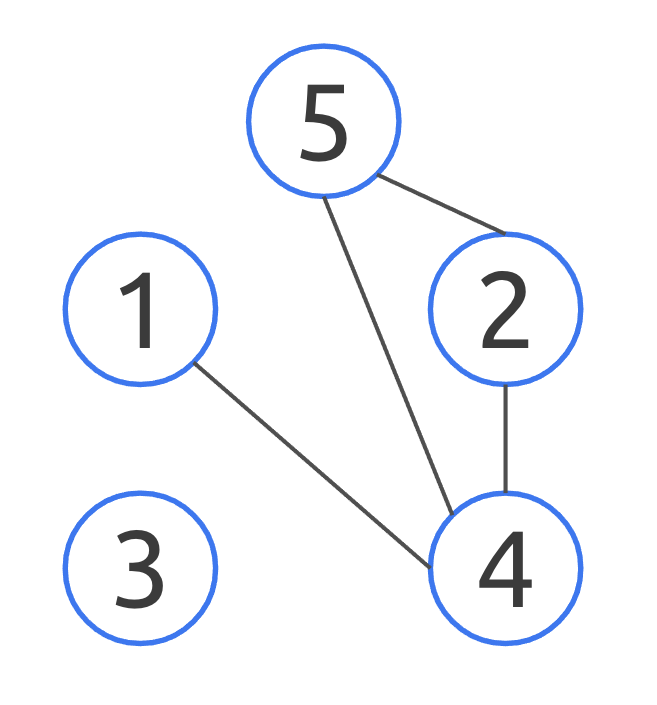

## Question 1

Which of the following statements about a graph node are true?


**a)** A graph node must store a pointer to its next element and optionally store a pointer to its previous element.

**b)** A graph node may have zero connections to other nodes.

**c)** A graph node may store a connection to itself.

**d)** A graph node can store up to six additional connections to other nodes.


Những phát biểu nào sau đây về một nút đồ thị là đúng?

**a)** Một nút đồ thị phải lưu trữ một con trỏ đến phần tử tiếp theo của nó và tùy chọn lưu trữ một con trỏ đến phần tử trước đó.

**b)** Một nút đồ thị có thể không kết nối với các nút khác.

**c)** Một nút đồ thị có thể lưu trữ một kết nối đến chính nó.

**d)** Một nút đồ thị có thể lưu trữ tối đa sáu kết nối bổ sung đến các nút khác.

### Solution

The correct answers are **b)** and **c)**.

**a)** Those are properties of a node in a linked list and doubly linked list.

**d)** There is no fundamental limit on the number of connections to other nodes that a node can store.

Câu trả lời đúng là **b)** và **c)**.

**a)** Đây là các đặc điểm của một nút trong danh sách liên kết đơn và danh sách liên kết đôi.

**d)** Không có giới hạn cơ bản về số lượng kết nối đến các nút khác mà một nút có thể lưu trữ.


## Question 2

Which of the following statements about a graph edge are true?

**a)** A graph edge may exist without any nodes connected to it.

**b)** A special type of edge (known as tridges) are formed when three nodes are connected by the same edge.

**c)** Edges may be defined implicitly (like a node storing a list of connected nodes) or explicitly (through their own class or object).

**d)** Two nodes may be linked by multiple different edges.

Những phát biểu nào sau đây về một cạnh đồ thị là đúng?

**a)** Một cạnh đồ thị có thể tồn tại mà không có bất kỳ nút nào được kết nối với nó.

**b)** Một loại cạnh đặc biệt (được gọi là tridges) được hình thành khi ba nút được kết nối bởi cùng một cạnh.

**c)** Các cạnh có thể được định nghĩa ngầm định (như một nút lưu trữ danh sách các nút được kết nối) hoặc rõ ràng (thông qua lớp hoặc đối tượng riêng của chúng).

**d)** Hai nút có thể được liên kết bởi nhiều cạnh khác nhau.

### Solution

The correct answers are **c)** and **d)**.

**a)** By definition, a graph edge is created to represent a connection between two nodes.

**b)** An edge only ever connects two nodes.

Câu trả lời đúng là **c)** và **d)**.

**a)** Theo định nghĩa, một cạnh của đồ thị được tạo ra để biểu diễn một kết nối giữa hai nút.

**b)** Một cạnh chỉ kết nối hai nút.

## Question 3

Which of the following statements about a graph are true?

**a)** A graph may exist with no nodes.

**b)** A graph may exist with no edges.

**c)** Every node in a graph must be connected to at least one other node.

**d)** Graphs typically contain a node known as the "start", "head", or "root" node that all other nodes are connected to.

Những phát biểu nào sau đây về một đồ thị là đúng?

**a)** Một đồ thị có thể tồn tại mà không có nút nào.

**b)** Một đồ thị có thể tồn tại mà không có cạnh nào.

**c)** Mọi nút trong đồ thị phải được kết nối với ít nhất một nút khác.

**d)** Đồ thị thường chứa một nút được gọi là nút "bắt đầu", "đầu" hoặc "gốc" mà tất cả các nút khác được kết nối đến.

### Solution

The correct answers are **a)** and **b)**.

**c)** A graph may have nodes with no edges, and it is also valid to have a graph with no edges at all.

**d)** Those are typically more common in linked lists or trees, which are specific types of graph.

Câu trả lời đúng là **a)** và **b)**.

**c)** Một đồ thị có thể có các nút không có cạnh, và cũng hoàn toàn hợp lệ nếu một đồ thị không có bất kỳ cạnh nào.

**d)** Những đặc điểm đó thường phổ biến hơn trong danh sách liên kết hoặc cây, vốn là những kiểu đồ thị cụ thể.

## Question 4

Assuming that the size of a graph's `node_list` is $n$, which of the following graph methods are $O(n)$ time complexity, based on the implementation in the Lesson Overview?

**a)** `add_node`

**b)** `print`

**c)** `remove_node`

**d)** `__init__`

Giả sử kích thước `node_list` của đồ thị là n, những phương thức đồ thị nào sau đây có độ phức tạp thời gian là *O(n)*, dựa trên triển khai trong Tổng quan bài học?


**a)** `add_node`

**b)** `print`

**c)** `remove_node`

**d)** `__init__`

### Solution

The correct answers are **b)** and **c)**.

**a)** In Python, arrays have approximately constant runtime (it's amortized), since they most commonly already have the space for the new element allocated.

**d)** This method only allocates a new array, which doesn't depend on the size of the list of nodes.

Câu trả lời đúng là **b)** và **c)**.

**a)** Trong Python, mảng có thời gian chạy xấp xỉ hằng số (trung bình), vì thông thường chúng đã được cấp phát sẵn không gian cho phần tử mới.

**d)** Phương thức này chỉ cấp phát một mảng mới, không phụ thuộc vào kích thước của danh sách các nút.

## Question 5

Nodes and edges in graphs have their own properties that can be measured. One such property is the **degree** of a node, or how many other nodes it is connected to.

For instance, in the following graph, the degree of each node is 4, since each node is connected to four other nodes.


Các nút và cạnh trong đồ thị có các thuộc tính riêng có thể đo lường được. Một trong những thuộc tính đó là **bậc** của một nút, tức là số lượng nút khác mà nó được kết nối.

Ví dụ, trong đồ thị sau, bậc của mỗi nút là 4, vì mỗi nút được kết nối với bốn nút khác.


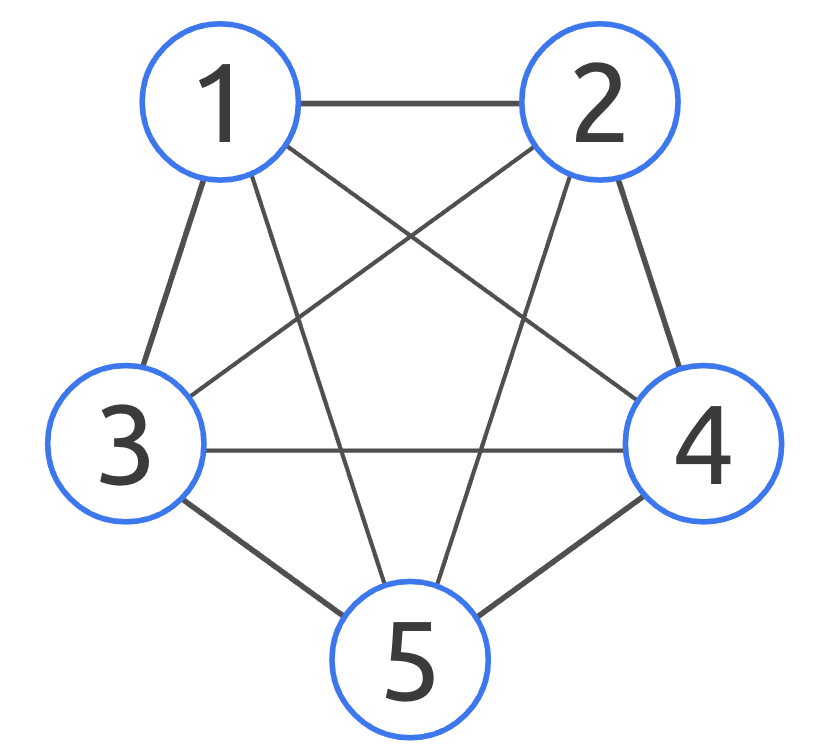



Calculating the degree of a node programatically is also useful, since we can use that data to draw conclusions about the graph.

Write a `get_degree` method for a node that returns its degree as an integer.

Tính toán bậc của một nút bằng lập trình cũng hữu ích, vì chúng ta có thể sử dụng dữ liệu đó để đưa ra kết luận về đồ thị.

Viết một phương thức (method) `get_degree` cho một nút, trả về bậc của nó dưới dạng số nguyên.

In [3]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    # TODO(you): implement
    return len(self.connected_to)

In [4]:
class Graph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)

  def print(self):
    for node in self.node_list:
      print(node)

### Hint

Keep in mind that the degree of a node is just the number of nodes that it is connected to. Is there a way to quickly calculate the number of connections a node in our graph has?


Hãy nhớ rằng bậc của một nút chỉ là số lượng các nút mà nó được kết nối. Có cách nào để nhanh chóng tính toán số lượng kết nối của một nút trong đồ thị mà chúng ta có không?

### Unit Tests

Run the following cell to check your answer against some unit tests.

Chạy cell sau đây để kiểm tra câu trả lời của bạn với một số bài kiểm thử đơn vị.

In [5]:
node_one = Node(1)
node_two = Node(2)
node_three = Node(3)
node_four = Node(4)
node_five = Node(5)

graph = Graph()
graph.add_node(node_one)
graph.add_node(node_two)
graph.add_node(node_three)
graph.add_node(node_four)
graph.add_node(node_five)

node_one.add_connection(node_four)
node_two.add_connection(node_four)
node_two.add_connection(node_five)
node_four.add_connection(node_five)

print(node_one.get_degree())
# Should print: 1

print(node_two.get_degree())
# Should print: 2

print(node_three.get_degree())
# Should print: 0

print(node_four.get_degree())
# Should print: 3

print(node_five.get_degree())
# Should print: 2

1
2
0
3
2


### Solution

Since we're trying to count the number of connections between nodes, we can either count the number of nodes in a node's `connected_to` array or just return the length of it.

Vì chúng ta đang cố gắng đếm số lượng kết nối giữa các nút, nên ta có thể đếm số nút trong mảng `connected_to` của một nút hoặc đơn giản là trả về độ dài của mảng đó.


In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

# Graph Representations / Biểu diễn đồ thị

## Lesson Overview  / Tổng quan bài học

Given the wide utility of graphs, it can often be more practical to represent them in memory using different techniques. These different representations depend on the structure and properties of the graph to determine how they are stored in memory.

Two of the most common graph representations are **adjacency lists** and **adjacency matrices**.

Với tính ứng dụng rộng rãi của đồ thị, việc biểu diễn chúng trong bộ nhớ bằng các kỹ thuật khác nhau thường có thể thực tế hơn. Những cách biểu diễn khác nhau này phụ thuộc vào cấu trúc và thuộc tính của đồ thị để xác định cách chúng được lưu trữ trong bộ nhớ.

Hai cách biểu diễn đồ thị phổ biến nhất là **danh sách kề (adjacency lists)** và **ma trận kề (adjacency matrices)**.

### Adjacency lists / Danh sách kề

In an **adjacency list**, each node is stored as its own object. Inside of that object is a list of adjacent nodes. This allows us to store additional data on the nodes or edges, and we'll see algorithms that use that extra data (for instance, what if the edges had values on them representing distance?).

Trong **danh sách kề (adjacency list)**, mỗi nút được lưu trữ dưới dạng một đối tượng (object) riêng. Bên trong đối tượng đó là một danh sách các nút kề. Điều này cho phép chúng ta lưu trữ dữ liệu bổ sung trên các nút hoặc cạnh, và chúng ta sẽ thấy các thuật toán sử dụng dữ liệu bổ sung đó (ví dụ, điều gì xảy ra nếu các cạnh có giá trị biểu diễn khoảng cách?).

A common representation is given below.

Một cách biểu diễn phổ biến được đưa ra dưới đây.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    # Nodes, in this implementation, are always connected reciprocally.
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])


class Graph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def get_nodes(self):
    # Returns a list of nodes stored in the graph.
    return self.node_list

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

---

Consider the following graph.

Hãy xem xét đồ thị sau.

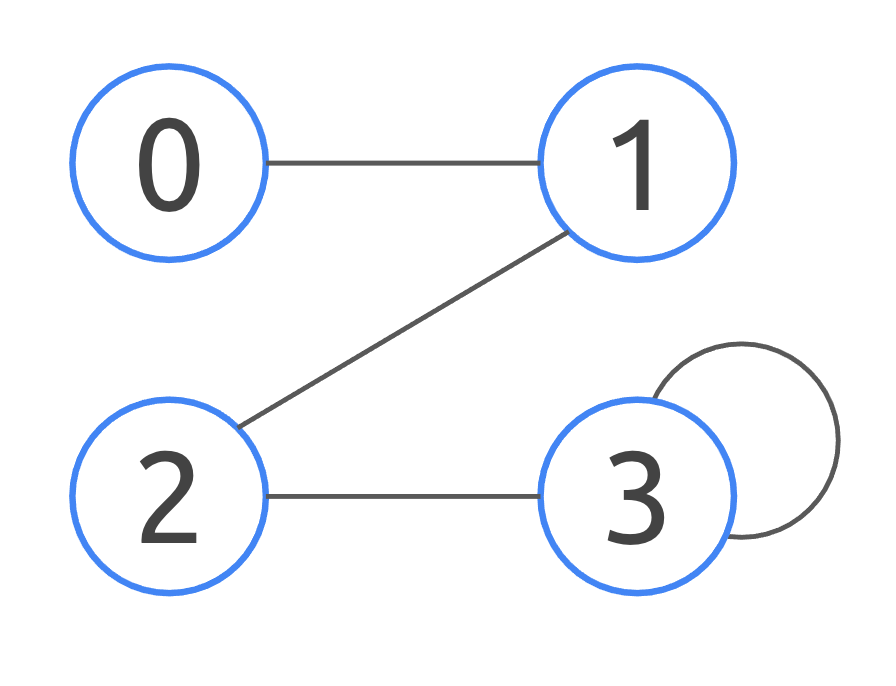

This graph can be represented using an adjacency list as:

Đồ thị này có thể được biểu diễn bằng danh sách kề như sau:

In [6]:
graph_one = Graph()
node_list = [Node(0), Node(1), Node(2), Node(3)]

for node in node_list:
  graph_one.add_node(node)

node_list[1].add_connection(node_list[0])
node_list[2].add_connection(node_list[0])
node_list[2].add_connection(node_list[1])
node_list[3].add_connection(node_list[2])
node_list[3].add_connection(node_list[3])

graph_one.print()

0: [1, 2]
1: [0, 2]
2: [0, 1, 3]
3: [2, 3]


If we wanted to add data on edges, you could create an `Edge` class that contains the two nodes that the edge connects.

Nếu chúng ta muốn thêm dữ liệu trên các cạnh, bạn có thể tạo một lớp `Edge` chứa hai nút mà cạnh đó kết nối.

### Adjacency matrices / Ma trận kề

In an **adjacency matrix**, nodes themselves aren't stored; we instead create a two-dimensional array that represents the nodes and place a 1 in any spot where the two 'nodes' in question are connected.

Trong **ma trận kề (adjacency matrix)**, các nút không được lưu trữ trực tiếp; thay vào đó, chúng ta tạo một mảng hai chiều đại diện cho các nút và đặt giá trị 1 ở bất kỳ vị trí nào mà hai "nút" được xét có kết nối với nhau.

Consider the following graph, where:

1.   $A$ is connected to $A$ and $B$
2.   $B$ is connected to $A$ and $C$
3.   $C$ is connected to $C$
4.   $D$ is connected to $D$

Hãy xem xét đồ thị sau, trong đó:

1. $A$ được kết nối với $A$ và $B$
2. $B$ được kết nối với $A$ và $C$
3. $C$ được kết nối với $C$
4. $D$ được kết nối với $D$

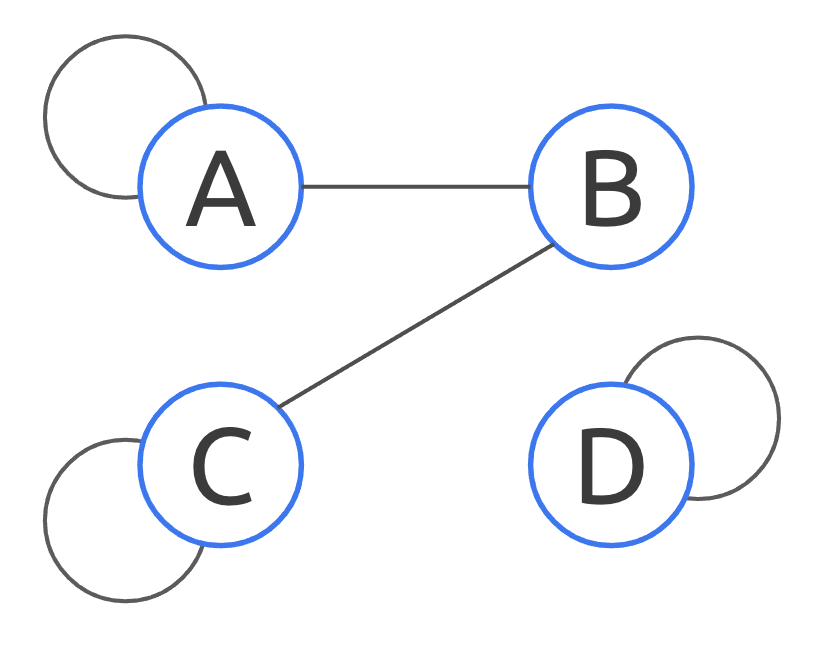

The adjacency matrix would look like:

Ma trận kề sẽ trông như thế này:

In [7]:
[
  [1, 1, 0, 0], # This row represents node A's connections.
  [1, 0, 1, 0], # This row represents node B's connections.
  [0, 1, 1, 0], # This row represents node C's connections.
  [0, 0, 0, 1], # This row represents node D's connections.
]

[[1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 1]]

The equivalent adjacency list would look like this:

Danh sách kề tương ứng sẽ trông như thế này:

In [8]:
graph_one = Graph()
node_list = [Node('A'), Node('B'), Node('C'), Node('D')]

for node in node_list:
  graph_one.add_node(node)

node_list[0].add_connection(node_list[0])
node_list[0].add_connection(node_list[1])
node_list[1].add_connection(node_list[2])
node_list[2].add_connection(node_list[2])
node_list[3].add_connection(node_list[3])


If you wanted to store additional information on the edges, you could instead use edge distance (or cost) rather than 1 or 0. To indicate that two nodes aren't connected, use a -1 rather than a positive integer.

Nếu bạn muốn lưu trữ thông tin bổ sung trên các cạnh, bạn có thể sử dụng khoảng cách cạnh (hoặc chi phí (cost)) thay vì 1 hoặc 0. Để chỉ ra rằng hai nút không được kết nối, hãy sử dụng -1 thay vì một số nguyên dương.

---

This is one possible implementation of adjacency matrices in Python (to distinguish it from an adjacency list implementation, we will refer to these in code as `AMGraph` and `ALGraph`, respectively):

Đây là một cách triển khai có thể có của ma trận kề trong Python (để phân biệt với cách triển khai danh sách kề, chúng ta sẽ gọi chúng trong code lần lượt là `AMGraph` và `ALGraph`):

In [ ]:
class AMGraph:
  # Implementation of an adjacency matrix graph.

  num_nodes = 0

  def __init__(self):
    self.node_list = []

  def get_nodes(self):
    return self.node_list

  def add_adjacency_row(self, adjacency_row):
    # Add a new node to the graph via an array representing its connections.
    # Adding [1, 1, 0, 1] would add a new node (Node 4) that's connected to
    # Nodes 1, 2, and 4, for instance, and update Nodes 1 and 2 with that
    # connection.
    # Add the adjacency list itself to the end of our matrix
    self.node_list.append(adjacency_row)
    for i in range(len(adjacency_row) - 1):
      # If a list that's too long gets submitted, we should break out.
      if i == len(self.node_list):
        break
      # Add a new edge to the adjacency list
      self.node_list[i].append(adjacency_row[i])

  @classmethod
  def from_matrix(cls, matrix):
    # This creates a new AMGraph from a user-supplied adjacency matrix.
    new_graph = cls()
    new_graph.node_list = matrix
    return new_graph

In [ ]:
graph_one = AMGraph()
graph_one.add_adjacency_row([0])
graph_one.add_adjacency_row([1, 0])
graph_one.add_adjacency_row([1, 1, 0])
graph_one.add_adjacency_row([0, 0, 1, 1])

for row in graph_one.node_list:
  print(row)

This implementation allows us to append nodes by adding their adjacency lists directly to the matrix.

Adjacency matrices are less commonly used than adjacency lists, primarily because every node-node pair must be represented, which adds to both time and space complexity.

Cách triển khai này cho phép chúng ta thêm các nút bằng cách thêm danh sách kề của chúng trực tiếp vào ma trận.

Ma trận kề ít được sử dụng hơn danh sách kề, chủ yếu vì mỗi cặp nút-nút đều phải được biểu diễn, điều này làm tăng cả độ phức tạp về thời gian và không gian.

## Question 1

Which of the following statements about an adjacency list are true?

Câu nào trong số các câu sau về danh sách kề là đúng?

**a)** An adjacency list usually has `Graph` and `Node` classes, but may optionally have an `Edge` class or other classes to track additional information.

**b)** An adjacency list is usually more space efficient than an adjacency matrix for sparse graphs (graphs in which there are not very many connections between nodes).

**c)** An adjacency list cannot store edge information, while an adjacency matrix can.

**a)** Danh sách kề thường có các lớp `Graph` và `Node`, nhưng tùy chọn có thể có lớp `Edge` hoặc các lớp khác để theo dõi thông tin bổ sung.

**b)** Danh sách kề thường tiết kiệm không gian hơn ma trận kề đối với đồ thị thưa (đồ thị có rất ít kết nối giữa các nút).

**c)** Danh sách kề không thể lưu trữ thông tin cạnh, trong khi ma trận kề thì có thể.

### Solution

The correct answers are **a)** and **b)**.

**c)** Adjacency lists can be built with an edge class or a variety of other implementations to store information about edges.

Câu trả lời đúng là **a)** và **b)**.

**c)** Các danh sách kề có thể được xây dựng với một lớp cạnh hoặc nhiều cách triển khai khác để lưu trữ thông tin về các cạnh.

## Question 2

Which of the following statements about an adjacency matrix are true?

Câu nào trong số các câu sau về ma trận kề là đúng?

**a)** An adjacency matrix may never store a number other than 0 or 1 in its rows and columns.

**b)** Adjacency matrices are always square, since any node can be connected to any other node.

**c)** An adjacency matrix for a graph with no edge information uses 0 to signify that two nodes are not connected and 1 to signify that they are.

**d)** Adjacency matrices are typically more space efficient than adjacency lists for dense graphs (graphs in which most nodes are connected to most other nodes).

**a)** Ma trận kề không bao giờ được lưu trữ số nào khác ngoài 0 hoặc 1 trong các hàng và cột của nó.

**b)** Ma trận kề luôn là ma trận vuông, vì bất kỳ nút nào cũng có thể được kết nối với bất kỳ nút nào khác.

**c)** Ma trận kề cho một đồ thị không có thông tin cạnh sử dụng 0 để biểu thị rằng hai nút không được kết nối và 1 để biểu thị rằng chúng được kết nối.

**d)** Ma trận kề thường tiết kiệm không gian hơn danh sách kề đối với đồ thị dày (đồ thị mà trong đó hầu hết các nút được kết nối với hầu hết các nút khác).

### Solution

The correct answers are **b)**, **c)**, and **d)**.

**a)** Certain graph implementations use numbers other than 0 or 1 to store the "weight" of an edge (for example, the length of a road between two cities, if the cities were nodes). In such cases, the numbers can be anything, and -1 is often used to indicate that two nodes are not connected.

Câu trả lời đúng là **b)**, **c)**, và **d)**.

**a)** Một số triển khai đồ thị sử dụng các số khác ngoài 0 hoặc 1 để lưu trữ "trọng số" của một cạnh (ví dụ, chiều dài của con đường giữa hai thành phố, nếu các thành phố là các nút). Trong những trường hợp như vậy, các số có thể là bất kỳ giá trị nào, và -1 thường được sử dụng để chỉ ra rằng hai nút không được kết nối.

## Question 3

Which of the following statements about whether real-world graphs would be better implemented as an adjacency list or matrix are true?

Câu nào trong số các câu sau nói rằng các đồ thị trong thế giới thực nên được biểu diễn dưới dạng danh sách kề hay ma trận kề là đúng?

**a)** A social network like Twitter is best implemented as an adjacency list, as users generally are not connected to every other user on the site.

**b)** A map of the United States is best represented as an adjacency matrix, as every city is connected to every other city by a vast network of highways.

**c)** A close group of friends is best represented as an adjacency matrix, as each person in the friend group is likely to be friends with each other person in the friend group.

**a)** Một mạng xã hội như Twitter được triển khai tốt nhất dưới dạng danh sách kề, vì người dùng thường không được kết nối với tất cả người dùng khác trên trang web.

**b)** Một bản đồ của Hoa Kỳ được biểu diễn tốt nhất dưới dạng ma trận kề, vì mọi thành phố đều được kết nối với mọi thành phố khác bởi một mạng lưới đường cao tốc rộng lớn.

**c)** Một nhóm bạn thân được biểu diễn tốt nhất dưới dạng ma trận kề, vì mỗi người trong nhóm bạn có khả năng là bạn với từng người khác trong nhóm.

### Solution

The correct answers are **b)** and **c)**.

**b)** While it's true that a *path* exists between every city, it isn't true that a *connection* exists between every city. There isn't a road from San Francisco to every other city in the United States! You'd need to pass through other cities on the way. This is a sparse graph, so it's probably better to represent this as an adjacency list.

Câu trả lời đúng là **b)** và **c)**.

**b)** Mặc dù đúng là tồn tại một *đường đi* giữa mọi thành phố, nhưng không đúng là có một *kết nối* giữa mọi thành phố. Không có con đường trực tiếp từ San Francisco đến tất cả các thành phố khác ở Hoa Kỳ! Bạn sẽ phải đi qua các thành phố khác trên đường đi. Đây là một đồ thị thưa, vì vậy có thể tốt hơn khi biểu diễn nó dưới dạng danh sách kề.


# Undirected, Directed, and Weighted Graphs / Đồ thị vô hướng, có hướng và có trọng số

## Lesson Overview / Tổng quan bài học

Until now, most graphs we've been dealing with have been undirected graphs, where all edges have no stated direction. There are also directed graphs, in which an edge can only be traversed in one direction, and weighted graphs, which are a type of graph in which traversing an edge has some **cost** or **weight** associated with it. Let's take a closer look at these three graph types.

Cho đến nay, hầu hết các đồ thị mà chúng ta đã làm việc đều là đồ thị vô hướng (undirected graphs), nơi các cạnh không có hướng xác định. Ngoài ra còn có đồ thị có hướng (directed graphs), nơi mỗi cạnh chỉ có thể được đi qua theo một hướng xác định, và đồ thị có trọng số, là một loại đồ thị mà việc đi qua một cạnh có **chi phí (cost)** hoặc **trọng số (weight)** đi kèm. Chúng ta hãy cùng tìm hiểu kĩ hơn về ba loại đồ thị này.

> An **undirected graph** is a graph in which all edges have no direction, so an $1 \rightarrow 2$ edge implies a $2 \rightarrow 1$ edge.

> **Đồ thị vô hướng** (undirected graph) là đồ thị trong đó tất cả các cạnh đều không có hướng, vì vậy một cạnh $1 \rightarrow 2$ ngầm định luôn tồn tại cạnh $2 \rightarrow 1$.

Undirected graphs work best when you want to express a reciprocal connection between two nodes. For instance, in many social networking sites, friendships are reciprocal: if I am your friend, you are my friend. Usually, in graph diagrams, that means that edges are represented with a solid line connecting the two nodes, like this:

**Đồ thị vô hướng** phù hợp nhất khi bạn muốn thể hiện mối quan hệ hai chiều giữa hai nút. Ví dụ, trong nhiều mạng xã hội, tình bạn mang tính tương hỗ: nếu tôi là bạn của bạn, thì bạn cũng là bạn của tôi. Thông thường, trong các sơ đồ đồ thị, điều này có nghĩa là các cạnh được biểu diễn bằng một đường liền nối hai nút như thế này:


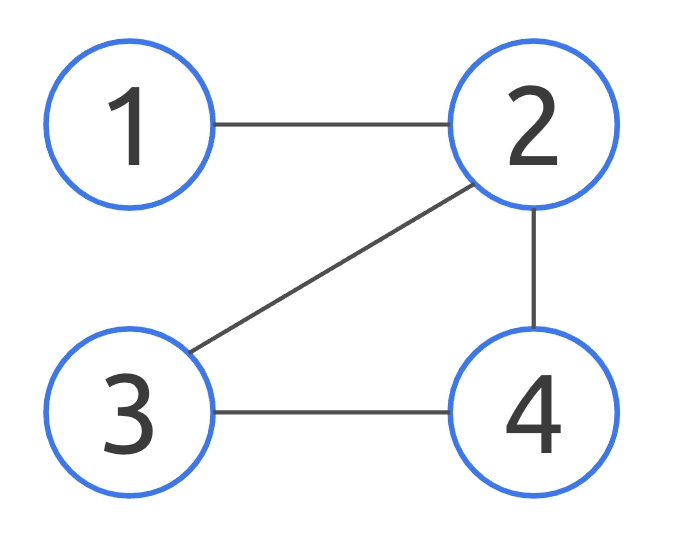

> A **directed graph** is a graph in which edges have a direction, so an $1 \rightarrow 2$ edge does not necessarily imply a $2 \rightarrow 1$ edge.

> **Đồ thị có hướng** (directed graph) là đồ thị trong đó các cạnh có hướng xác định, do đó cạnh $1 \rightarrow 2$ không nhất thiết ngầm định tồn tại cạnh $2 \rightarrow 1$.

Directed graphs work best when your connections are not reciprocal. On those same social networking sites, you can often follow other users to get more information about what they post. If I'm following you, however, there is no requirement that you must also follow me. As another example, roads and highways are often represented by directed graphs. Even though there's usually a road from location $A$ to location $B$ if there's a road from $B \rightarrow A$, this is not always the case. A one-way street is an example of a situation where an $A \rightarrow B$ road does not have a $B \rightarrow A$ equivalent. For directed graphs, edges are generally represented with arrows, like this:

**Đồ thị có hướng** phù hợp nhất khi các kết nối của bạn không mang tính tương hỗ. Trên cùng các trang mạng xã hội đó, bạn thường có thể theo dõi người dùng khác để nhận thêm thông tin về những gì họ đăng. Tuy nhiên, nếu tôi theo dõi bạn, không có yêu cầu bắt buộc rằng bạn cũng phải theo dõi tôi.

Một ví dụ khác là các con đường và đường cao tốc thường được biểu diễn bằng đồ thị có hướng. Mặc dù thông thường sẽ có đường từ vị trí $A$ đến vị trí $B$ nếu có đường từ $B \rightarrow A$, nhưng điều này không phải lúc nào cũng đúng. Đường một chiều là ví dụ cho trường hợp có đường $A \rightarrow B$ nhưng không có đường tương ứng $B \rightarrow A$.

Trong đồ thị có hướng, các cạnh thường được biểu diễn bằng mũi tên như thế này:


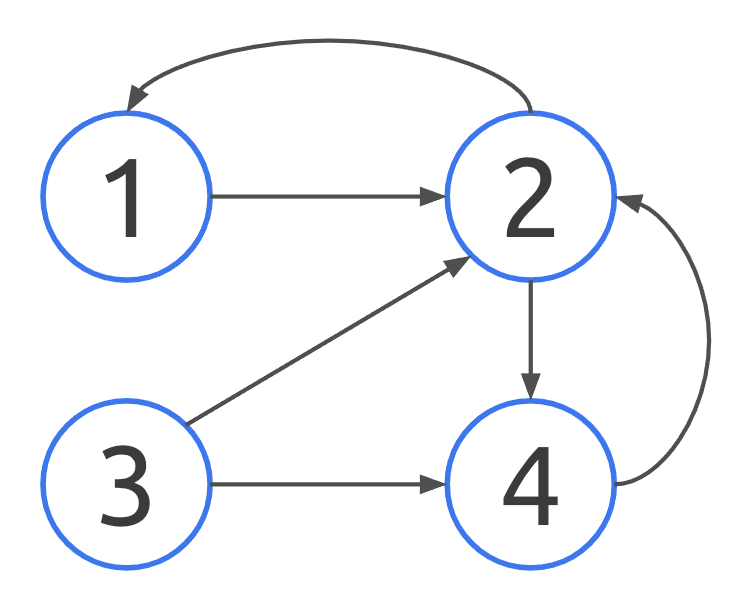

> A **weighted graph** is a graph in which the edges of the graph have an associated weight, or cost.

> **Đồ thị có trọng số** (weighted graph) là đồ thị trong đó các cạnh của đồ thị có trọng số hoặc chi phí tương ứng.

Weighted graphs are most commonly used when you want to express that one connection is easier to traverse than another. This is useful for path-finding algorithms. The highway example would best be represented as a weighted graph, where the weight is the mileage between location $A$ and location $B$. If the mileage between $C$ and $D$ was lower than the mileage between $A$ and $B$, the weight of that edge would be lower than the weight of the $A \rightarrow B$ edge. "Weight" and "cost" are used interchangeably in the context of weighted graphs. Weighted graphs can be directed or undirected, but generally the weight is written next to the edge in question:

**Đồ thị có trọng số** thường được dùng khi bạn muốn thể hiện một kết nối dễ đi qua hơn những kết nối khác. Điều này rất hữu ích cho các thuật toán tìm đường.  

Ví dụ về hệ thống đường cao tốc có thể biểu diễn tốt nhất bằng đồ thị có trọng số, với trọng số chính là khoảng cách dặm giữa vị trí $A$ và $B$. Nếu khoảng cách giữa $C$ và $D$ ngắn hơn khoảng cách giữa $A$ và $B$, trọng số của cạnh đó sẽ nhỏ hơn trọng số cạnh $A \rightarrow B$.  

Trong đồ thị có trọng số, các thuật ngữ "trọng số (weight)" và "chi phí (cost)" có thể dùng thay thế cho nhau. Đồ thị loại này có thể là có hướng hoặc vô hướng, nhưng thông thường trọng số sẽ được ghi kế bên cạnh tương ứng như sau:

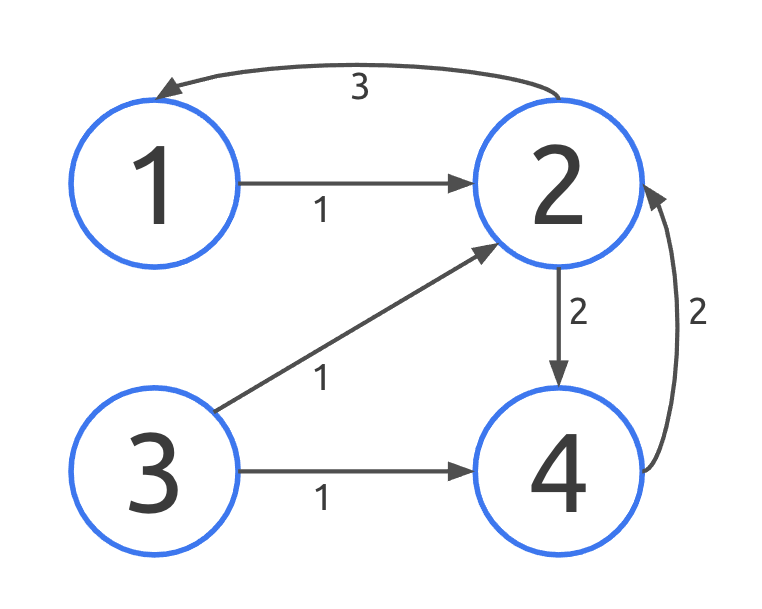

### Representing graphs in memory / Biểu diễn đồ thị trong bộ nhớ

Representing different types of graphs in memory can require additional data to be stored beyond what we typically store for an undirected graph. In some cases, you may even store less data, as you do not need to track the reciprocal connection.

Việc biểu diễn các loại đồ thị khác nhau trong bộ nhớ có thể yêu cầu dữ liệu lưu trữ thêm so với đồ thị vô hướng thông thường. Trong một số trường hợp, bạn có thể lưu ít dữ liệu hơn do không cần theo dõi các kết nối tương hỗ.

Undirected graphs can be represented as adjacency lists (a list of nodes that store their connections to other nodes) or adjacency matrices (a matrix that stores a 1 at $(M, N)$ if node $M$ has a connection to node $N$) with information about nodes and edges added as needed.

Đồ thị vô hướng có thể được biểu diễn dưới dạng danh sách kề (một danh sách các nút lưu trữ kết nối của chúng tới các nút khác) hoặc ma trận kề (một ma trận lưu giá trị 1 tại vị trí $(M, N)$ nếu nút $M$ có kết nối với nút $N$) cùng với các thông tin về nút và cạnh được thêm vào khi cần.

Directed graphs can be represented similarly, but since the edge connections aren't reciprocal, adding a connection should not add one in the opposite direction. In an adjacency matrix, for instance, that means that you may have a 1 in the matrix without a corresponding 1 in the symmetric location (as you would for an undirected graph), as in the following graph.

Đồ thị có hướng có thể được biểu diễn tương tự, nhưng do các kết nối cạnh không có tính tương hỗ, việc thêm một kết nối sẽ không tự động thêm kết nối ngược lại. Trong ma trận kề, điều này có nghĩa bạn có thể có giá trị 1 tại một vị trí mà không cần giá trị 1 đối xứng (như trong đồ thị vô hướng), như minh họa trong đồ thị sau:


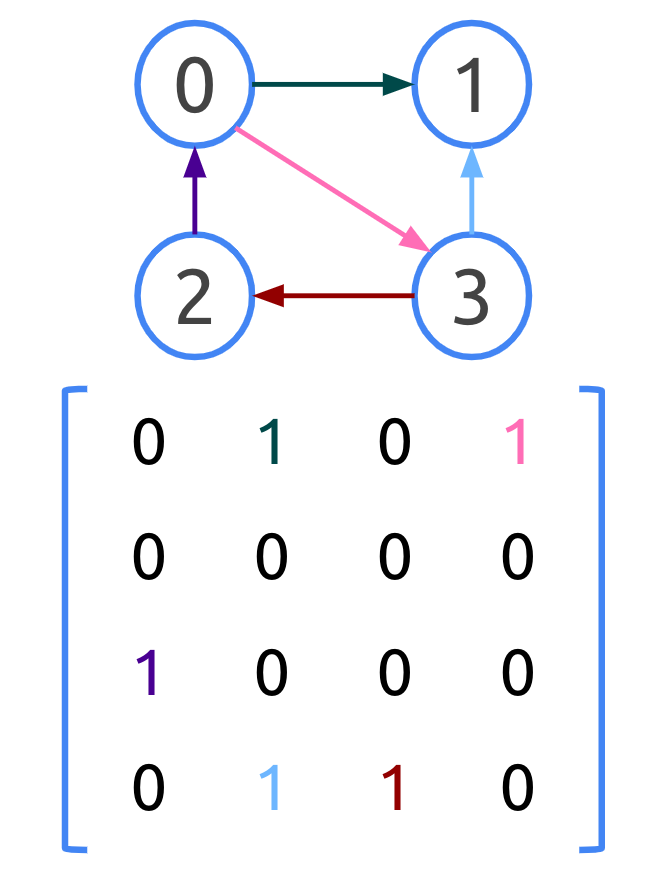

Notice how the $3 \rightarrow 2$ edge doesn't have a corresponding $2 \rightarrow 3$ edge, and how that's reflected in the matrix. Each 1 has a color matching its corresponding edge in both the graph and the matrix.

For a weighted graph, you'll need to have a way to store the weights. This may require you to make a different `Edge` class for adjancency lists or to put the weight as the value in an adjacency matrix.

Hãy lưu ý cách cạnh $3 \rightarrow 2$ không có cạnh tương ứng $2 \rightarrow 3$, và cách điều này được thể hiện trong ma trận. Mỗi số 1 có màu sắc tương ứng với cạnh của nó trong cả đồ thị lẫn ma trận.

Đối với đồ thị có trọng số, bạn cần có cách lưu trữ các trọng số. Điều này có thể yêu cầu bạn tạo một lớp `Edge` riêng cho danh sách kề hoặc đặt trọng số làm giá trị trong ma trận kề.

### Undirected graphs in code / Đồ thị vô hướng trong code

Recall our earlier implementation of an undirected graph.

Nhắc lại cách biểu diễn đồ thị vô hướng

In [9]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

In [10]:
class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

The code below creates the following undirected graph.

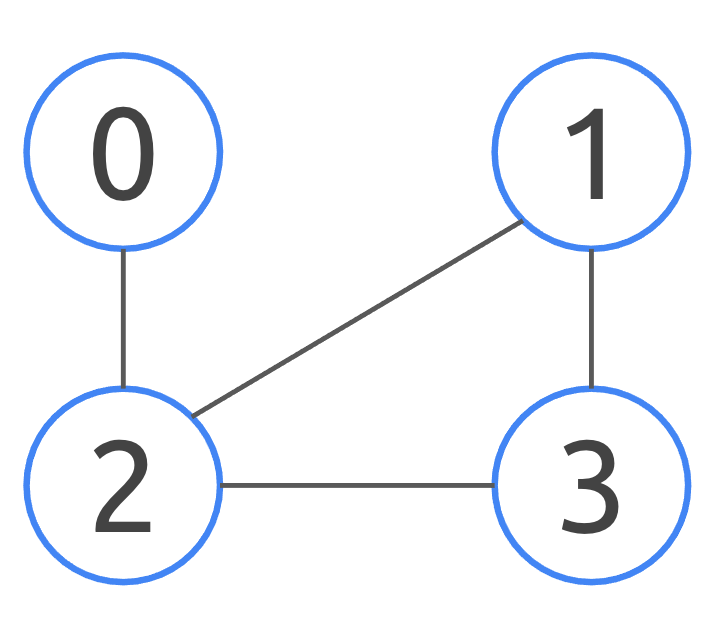

In [11]:
node_list = [Node(0), Node(1), Node(2), Node(3)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[2])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[2].add_connection(node_list[3])

graph.print()

0: [2]
1: [2, 3]
2: [0, 1, 3]
3: [1, 2]


## Question 1

Which of the following statements about undirected graphs are true?

Câu nào sau đây về đồ thị vô hướng là đúng?

**a)** Nodes in undirected graphs cannot be connected to themselves via edges.

**b)** In an undirected graph, if node $A$ is connected to node $B$ and node $C$, a $B \longleftrightarrow C$ connection must also exist.

**c)** An undirected graph cannot have weights on edges.

**d)** Undirected graphs cannot be represented as adjacency matrices.

**a)** Các nút trong đồ thị vô hướng không thể được kết nối với chính chúng thông qua các cạnh.

**b)** Trong đồ thị vô hướng, nếu nút $A$ được kết nối với nút $B$ và nút $C$, thì cũng phải tồn tại kết nối $B \longleftrightarrow C$.

**c)** Đồ thị vô hướng không thể có trọng số trên các cạnh.

**d)** Đồ thị vô hướng không thể được biểu diễn dưới dạng ma trận kề.

### Solution

All answers are incorrect.

**a)** There's no restriction on self-loops for undirected graphs.

**b)** The only connections that are guaranteed by that statement are $A \rightarrow C$, $A \rightarrow B$, $C \rightarrow A$, and $B \rightarrow A$.

**c)** A graph can be undirected and weighted at the same time.

**d)** There's no such restriction. When representing an undirected graph as an adjacency matrix, just remember that any $A \rightarrow B$ connection implies a $B \rightarrow A$ connection.

Tất cả câu trả lời đều sai.

**a)** Không có sự hạn chế nào đối với các vòng lặp tự thân (self-loops) trong đồ thị vô hướng.

**b)** Những kết nối duy nhất được đảm bảo bởi phát biểu đó là $A \rightarrow C$, $A \rightarrow B$, $C \rightarrow A$, và $B \rightarrow A$.

**c)** Một đồ thị có thể vừa vô hướng vừa có trọng số cùng lúc.

**d)** Không có sự hạn chế nào như vậy. Khi biểu diễn một đồ thị vô hướng dưới dạng ma trận kề, chỉ cần nhớ rằng bất kỳ kết nối $A \rightarrow B$ nào cũng sẽ ngụ ý một kết nối $B \rightarrow A$.


## Question 2

Which of the following statements about directed graphs are true?

Câu nào sau đây về đồ thị có hướng là đúng?

**a)** A graph can be both directed and weighted at the same time.

**b)** In a directed graph, if a $A \rightarrow B$ connection exists, a $B \rightarrow A$ connection cannot exist.

**c)** A graph can have directed and undirected edges at the same time.

**d)** Undirected graphs can be represented as directed graphs as long as each $A \longleftrightarrow B$ edge is represented by an $A \rightarrow B$ edge and a $B \rightarrow A$ edge.

**a)** Một đồ thị có thể vừa có hướng vừa có trọng số cùng lúc.

**b)** Trong một đồ thị có hướng, nếu tồn tại một cạnh $A \rightarrow B$, thì không thể tồn tại cạnh $B \rightarrow A$.

**c)** Một đồ thị có thể có cả cạnh có hướng và cạnh vô hướng cùng lúc.

**d)** Các đồ thị vô hướng có thể được biểu diễn dưới dạng đồ thị có hướng miễn là mỗi cạnh $A \longleftrightarrow B$ được biểu diễn bằng một cạnh $A \rightarrow B$ và một cạnh $B \rightarrow A$.


### Solution

The correct answers are **a)** and **d)**.

**b)** There's no restriction on reciprocal connections in directed graphs; they're just separate edges.

**c)** Generally, a directed graph stores an undirected edge as two reciprocal directed edges. If you want something with directed and undirected edges, it's often better to store the edges that way to make the graph consistent (and easier for another person to understand).

Các câu trả lời đúng là **a)** và **d)**.

**b)** Không có hạn chế nào đối với các kết nối hai chiều trong đồ thị có hướng; chúng chỉ là các cạnh riêng biệt.

**c)** Thông thường, một đồ thị có hướng lưu trữ một cạnh vô hướng dưới dạng hai cạnh hai chiều có hướng. Nếu bạn muốn một đồ thị có cả cạnh có hướng và vô hướng, thường thì tốt hơn là lưu trữ các cạnh theo cách đó để làm cho đồ thị nhất quán (và dễ hiểu hơn cho người khác).


## Question 3

Which of the following real world graphs are better represented as directed graphs than undirected graphs?

Những đồ thị thế giới thực nào sau đây được biểu diễn dưới dạng đồ thị có hướng tốt hơn là đồ thị vô hướng?

**a)** A social network like Twitter (user $A$ can follow user $B$, but user $B$ does not have to follow user $A$ back) where an $A \rightarrow B$ edge exists if user $A$ follows user $B$.

**b)** A social network like Facebook (user $A$ can add user $B$ as a friend, but user $A$ is only friends with user $B$ if user $B$ is friends with user $A$) where an $A \rightarrow B$ edge exists if user $A$ is friends with $B$.

**c)** A representation of links between various websites online, where an $A \rightarrow B$ edge exists if page $A$ links to page $B$.

**d)** A graph representing a building's layout, where the edges are staircases connecting various floors.

**e)** A highway network between several major cities, where an $A \longleftrightarrow B$ edge exists if there is a highway between city $A$ and city $B$.

**f)** A representation of roads and intersections inside of a major city, where an $A \rightarrow B$ edge exists if there is a road between intersection $A$ and intersection $B$.

**a)** Một mạng xã hội như Twitter (người dùng $A$ có thể theo dõi người dùng $B$, nhưng người dùng $B$ không nhất thiết phải theo dõi lại người dùng $A$) trong đó tồn tại một cạnh $A \rightarrow B$ nếu người dùng $A$ theo dõi người dùng $B$.

**b)** Một mạng xã hội như Facebook (người dùng $A$ có thể thêm người dùng $B$ làm bạn, nhưng người dùng $A$ chỉ là bạn với người dùng $B$ nếu người dùng $B$ cũng là bạn với người dùng $A$) trong đó tồn tại một cạnh $A \rightarrow B$ nếu người dùng $A$ là bạn với $B$.

**c)** Một biểu diễn các liên kết giữa các trang web trực tuyến, trong đó tồn tại một cạnh $A \rightarrow B$ nếu trang $A$ liên kết đến trang $B$.

**d)** Một đồ thị biểu diễn sơ đồ bố trí của một tòa nhà, trong đó các cạnh là cầu thang nối các tầng khác nhau.

**e)** Một mạng lưới đường cao tốc giữa một số thành phố lớn, trong đó tồn tại một cạnh $A \longleftrightarrow B$ nếu có một đường cao tốc giữa thành phố $A$ và thành phố $B$.

**f)** Một biểu diễn các con đường và ngã tư bên trong một thành phố lớn, trong đó tồn tại một cạnh $A \rightarrow B$ nếu có một con đường giữa ngã tư $A$ và ngã tư $B$.


### Solution

The correct answers are **a)**, **c)**, and **f)**.

**a)** Those are properties of a node in a linked list and doubly linked list.

**b)** It's technically correct in the sense that all undirected graphs can be represented as a directed graph, but given that friendships are reciprocal, here, this graph is really more undirected.

**d)** Generally, stairs can be used to go both up and down, so there's no reason this shouldn't be an undirected graph. This might change if the stairs are escalators, though!

**e)** Highways are generally symmetrical (there aren't typically one-way highways), so if you have two cities connected via a highway that edge would typically be undirected.

Các câu trả lời đúng là **a)**, **c)** và **f)**.

**a)** Đây là các đặc điểm của một nút trong danh sách liên kết và danh sách liên kết đôi.

**b)** Về mặt kỹ thuật là đúng, vì tất cả các đồ thị vô hướng có thể được biểu diễn dưới dạng đồ thị có hướng, nhưng vì tình bạn là hai chiều, nên đồ thị này thực sự là vô hướng hơn.

**d)** Thông thường, cầu thang có thể được sử dụng để đi lên và đi xuống, vì vậy không có lý do gì để nó không phải là đồ thị vô hướng. Tuy nhiên, điều này có thể thay đổi nếu cầu thang là thang cuốn!

**e)** Các con đường cao tốc thường là hai chiều (thường không có cao tốc một chiều), vì vậy nếu có hai thành phố được kết nối qua một con đường cao tốc, cạnh đó thường sẽ là vô hướng.


## Question 4

Which of the following statements about weighted graphs are true?

Câu nào sau đây về đồ thị có trọng số là đúng?

**a)** Any undirected or directed graph is a weighted graph; all the edge weights are just the same value.

**b)** An adjacency matrix can be used to represent a weighted graph by storing the edge weights instead of 0 or 1.

**c)** A weighted graph cannot have negative edge weights.

**d)** A weighted graph should never have two edges with the same weight.

**a)** Bất kỳ đồ thị vô hướng hoặc có hướng nào cũng là một đồ thị có trọng số; tất cả các trọng số của cạnh chỉ đơn giản là cùng một giá trị.

**b)** Một ma trận kề có thể được dùng để biểu diễn một đồ thị có trọng số bằng cách lưu trữ các trọng số của cạnh thay vì 0 hoặc 1.

**c)** Một đồ thị có trọng số không thể có cạnh có trọng số âm.

**d)** Một đồ thị có trọng số không bao giờ được có hai cạnh có cùng trọng số.


### Solution

The correct answers are **a)** and **b)**.

**c)** You could imagine a graph where the edges are business decisions that might make the company money, with each edge's weight being how much money the company would make. If you would *lose* money from traveling along that edge, the edge weight could be negative. There are other examples; try coming up with some!

**d)** There's no requirement for that to be the case. If that happens, then the cost of travelling along either of those edges is just the same.

Các câu trả lời đúng là **a)** và **b)**.

**c)** Bạn có thể tưởng tượng một đồ thị trong đó các cạnh là các quyết định kinh doanh có thể mang lại lợi nhuận cho công ty, với trọng số của mỗi cạnh là số tiền công ty có thể kiếm được. Nếu bạn *mất* tiền khi di chuyển theo cạnh đó, trọng số của cạnh có thể là số âm. Có những ví dụ khác; thử nghĩ ra một số ví dụ!

**d)** Không có yêu cầu nào để điều đó phải xảy ra. Nếu điều đó xảy ra, thì chi phí di chuyển theo bất kỳ cạnh nào trong số đó đều giống nhau.


## Question 5

Which of the following real world graphs can be represented as a weighted graph?

Những đồ thị thế giới thực nào sau đây có thể được biểu diễn dưới dạng đồ thị có trọng số?

**a)** A network of airports where the weights are the average price of a flight between those two airports.

**b)** A network of airports where the weights are the average distance of a flight between those two airports.

**c)** A branching storyline where the weights are the number of pages before the next branch in the story.

**d)** The internet, where the weights correspond to the time to load page $B$ given a link from page $A$.

**a)** Một mạng lưới sân bay trong đó các trọng số là giá vé trung bình của một chuyến bay giữa hai sân bay đó.

**b)** Một mạng lưới sân bay trong đó các trọng số là khoảng cách trung bình của một chuyến bay giữa hai sân bay đó.

**c)** Một cốt truyện phân nhánh trong đó các trọng số là số trang trước khi đến nhánh tiếp theo trong câu chuyện.

**d)** Mạng internet, trong đó các trọng số tương ứng với thời gian tải trang $B$ khi có liên kết từ trang $A$.

### Solution

All answers are correct.

Tất cả các câu trả lời đều đúng.

# Breadth-First Search (BFS) / Tìm kiếm theo chiều rộng

## Lesson Overview / Tổng quan bài học

> **Breadth-first search (BFS)** is a graph search technique that prioritizes searching all nodes adajacent to the current node before processing any further.

> **Tìm kiếm theo chiều rộng (Breadth-first search)** là một kỹ thuật tìm kiếm trên đồ thị ưu tiên duyệt tất cả các nút liền kề với nút hiện tại trước khi xử lý xa hơn.

While depth-first search prioritizes searching as *deep* as possible along a single pathway, breadth-first search prioritizes searching as *wide* as possible adjacent to the current node.

When we talk about breadth, a visual example can help illustrate the term.


Trong khi tìm kiếm theo chiều sâu (dfs) ưu tiên tìm kiếm *sâu* nhất có thể dọc theo một đường đi duy nhất, thì tìm kiếm theo chiều rộng (bfs) ưu tiên tìm kiếm *rộng* nhất có thể các nút liền kề với nút hiện tại.

Khi chúng ta nói về "chiều rộng", một ví dụ trực quan có thể giúp minh họa rõ hơn thuật ngữ này.



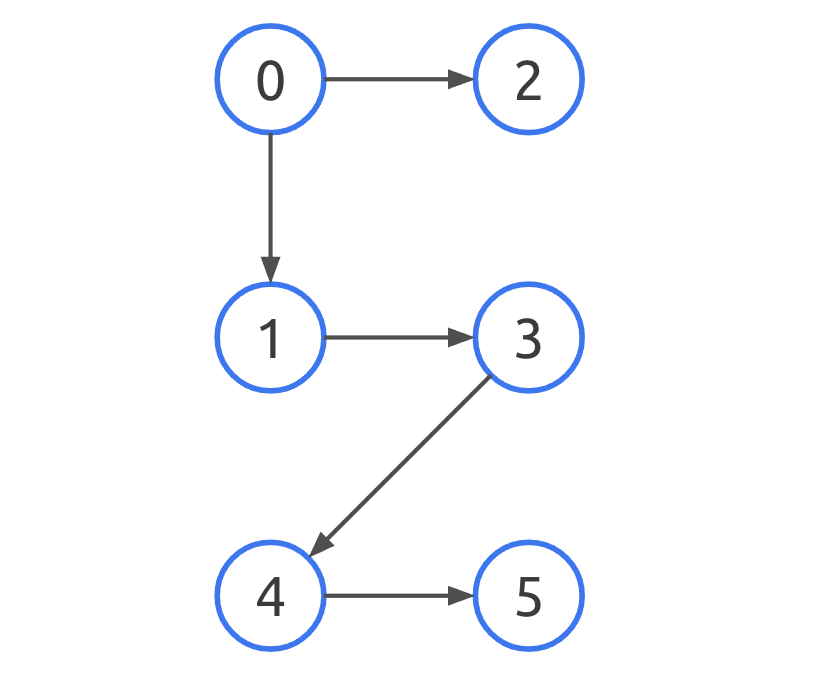


If we were looking for the node with the value $2$ and tried a depth-first search, we would explore the nodes in the following order (or similar, depending on the implementation):

$0, 1, 3, 4, 5, 2$

In breadth-first search, we start by examining a node's neighbors before moving on to any of the connected nodes. This allows us to explore a graph differently than we would in depth-first search, and is used for solving different problems where depth-first search doesn't necessarily produce the quickest or best solutions. For instance, in the above graph, we prioritize the first path we see when searching via depth-first search, which causes us to go down a fairly long chain of nodes before we see 2, the node we're looking for.

Nếu chúng ta đang tìm nút có giá trị $2$ và sử dụng thuật toán tìm kiếm theo chiều sâu (dfs), ta sẽ duyệt qua các nút theo thứ tự sau (hoặc tương tự, tùy thuộc vào cách triển khai):

$0, 1, 3, 4, 5, 2$

Trong tìm kiếm theo chiều rộng (bfs), chúng ta bắt đầu bằng cách kiểm tra các nút láng giềng của một nút trước khi chuyển sang bất kì nút được kết nối nào khác. Điều này cho phép chúng ta duyệt đồ thị theo một cách khác so với tìm kiếm theo chiều sâu, và được sử dụng để giải quyết các bài toán khác, nơi tìm kiếm theo chiều sâu không nhất thiết mang lại giải pháp nhanh nhất hoặc tốt nhất. Ví dụ, trong đồ thị ở trên, chúng ta ưu tiên đường đi đầu tiên mà ta thấy khi tìm kiếm bằng tìm kiếm theo chiều sâu, điều này khiến chúng ta đi xuống một chuỗi nút khá dài trước khi gặp nút 2 — là nút mà ta đang tìm kiếm.


### Breadth-first search in code / Tìm kiếm theo chiều rộng trong code

The major difference between breadth-first search and depth-first search is that breadth-first search uses a queue to process nodes, rather than the stack (or recursive stack) that depth-first search typically utilizes. Beyond that, we can still use the same `DirectedGraph` and `Node` classes that we've used in previous lessons.

Điểm khác biệt chính giữa tìm kiếm theo chiều rộng và tìm kiếm theo chiều sâu là tìm kiếm theo chiều rộng sử dụng một hàng đợi (queue) để xử lý các nút, thay vì ngăn xếp (stack) hoặc ngăn xếp đệ quy mà tìm kiếm theo chiều sâu thường sử dụng. Ngoài điều đó ra, chúng ta vẫn có thể sử dụng cùng các lớp `DirectedGraph` và `Node` như đã dùng trong các bài học trước.

In [12]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [13]:
#persistent
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

  def breadth_first_search(self, node_name_to_find):
    # We want to set up a queue and a way to check which nodes we've seen.
    # If the graph has no nodes in it, return None, since we won't be able to
    # find the node we're looking for.
    node_queue = []
    if not self.node_list:
      return None
    visited_nodes = []

    # The graph may not be connected, so we should iterate through node_list
    # and add those nodes to the queue if we haven't seen them before.
    for node in self.node_list:
      if node not in visited_nodes:
        visited_nodes.append(node)
        node_queue.append(node)

      # Once we've added a start point to the queue, we can check the front of
      # the queue and see if that's the node we're looking for. If not, we
      # enqueue the node's connections (provided we haven't seen them) so that
      # we can explore from those nodes next.
      while node_queue:
        node_to_check = node_queue.pop(0)
        if node_to_check.name == node_name_to_find:
          return node_to_check
        else:
          for next_node in node_to_check.connected_to:
            if next_node not in visited_nodes:
              visited_nodes.append(next_node)
              node_queue.append(next_node)

Here, we're checking to see if we've seen the node before we enqueue it, so that we don't do additional work and enqueue a node that we've already seen. By using a queue, we process all of a node's direct connections before searching the rest of its descendants.

Ở đây, chúng ta kiểm tra xem một nút đã được duyệt hay chưa trước khi đưa nó vào hàng đợi, để tránh thực hiện công việc dư thừa và đưa vào hàng đợi một nút đã được duyệt rồi. Bằng cách sử dụng hàng đợi, chúng ta xử lý tất cả các kết nối trực tiếp của một nút trước khi tìm kiếm các nút con còn lại của nó.


## Question 1

Which of the following statements about breadth-first search are true?

Câu nào sau đây về thuật toán tìm kiếm theo chiều rộng là đúng?


**a)** Breadth-first search relies on a queue to traverse each node and then the nodes adjacent to that node.

**b)** Breadth-first search has a smaller runtime complexity to depth-first search, since it's searching nodes adjacent to the current node rather than following a lengthy path before backtracking.

**c)** Breadth-first search attempts to visit every node and every node connected to another node, so it runs in $O(n^2)$ time where $n$ is the number of nodes in the graph.

**d)** Unlike depth-first search, breadth-first search doesn't need to keep track of what nodes have already been seen because breadth-first search doesn't rely on recursion.

**e)** Depth-first search over a complete graph (a graph with an edge between every pair of nodes) has a shorter worst case runtime than breadth-first search, since each node is connected to every other node.

**a)** Tìm kiếm theo chiều rộng dựa vào hàng đợi để duyệt từng nút và sau đó là các nút liền kề với nút đó.

**b)** Tìm kiếm theo chiều rộng có độ phức tạp thời gian nhỏ hơn tìm kiếm theo chiều sâu, vì nó tìm kiếm các nút liền kề với nút hiện tại thay vì theo một đường đi dài rồi quay lại.

**c)** Tìm kiếm theo chiều rộng cố gắng duyệt mọi nút và mọi nút được kết nối với nút khác, nên nó chạy trong thời gian $O(n^2)$, trong đó $n$ là số lượng nút trong đồ thị.

**d)** Không giống như tìm kiếm theo chiều sâu, tìm kiếm theo chiều rộng không cần theo dõi những nút đã được duyệt vì tìm kiếm theo chiều rộng không dựa vào đệ quy.

**e)** Tìm kiếm theo chiều sâu trên một đồ thị đầy đủ (một đồ thị có cạnh giữa mọi cặp nút) có thời gian chạy trong trường hợp xấu nhất ngắn hơn tìm kiếm theo chiều rộng, vì mỗi nút được kết nối với mọi nút khác.


### Solution

The correct answer is **a)**.

**b)** Both breadth- and depth-first search have the same runtime complexity (though depending on your graph, one may complete more quickly than the other), namely $O(n)$ where $n$ is the total number of nodes.

**c)** While breadth-first search does process nodes and their neighbors, it should visit any given node only once (by keeping track of the nodes it has visited). As a result, it runs in $O(n)$ time.

**d)** Breadth-first search loops until it finds the node or sees every node in the graph. If you don't keep track of visited nodes, that loop could run forever.

**e)** In the worst case, the search needs to visit every node. Both depth-first and breadth-first search should, if implemented well, visit each node exactly once, so both have a runtime complexity of $O(n)$.

Câu trả lời đúng là **a)**.

**b)** Cả tìm kiếm theo chiều rộng và tìm kiếm theo chiều sâu đều có độ phức tạp thời gian giống nhau (mặc dù tùy thuộc vào đồ thị của bạn, một trong hai có thể hoàn thành nhanh hơn), cụ thể là $O(n)$ với $n$ là tổng số nút.

**c)** Mặc dù tìm kiếm theo chiều rộng xử lý các nút và các nút kề của chúng, nhưng nó chỉ nên duyệt mỗi nút một lần (bằng cách theo dõi các nút đã được thăm). Do đó, nó có độ phức tạp thời gian là $O(n)$.

**d)** Tìm kiếm theo chiều rộng lặp lại cho đến khi tìm thấy nút cần tìm hoặc đã duyệt qua tất cả các nút trong đồ thị. Nếu bạn không theo dõi các nút đã được thăm, vòng lặp đó có thể chạy vô hạn.

**e)** Trong trường hợp xấu nhất, thuật toán phải thăm tất cả các nút. Cả tìm kiếm theo chiều rộng và chiều sâu, nếu được triển khai đúng cách, đều chỉ thăm mỗi nút đúng một lần, vì vậy cả hai đều có độ phức tạp thời gian là $O(n)$.


# Depth-First Search (DFS) / Tìm kiếm theo chiều sâu

## Lesson Overview / Tổng quan bài học

Searching a data structure for a value is usually done using linear or binary search, since many data structures store data in an ordered fashion. For data structures like graphs, search can't be done "linearly", as there are no "start" and "end" points within a graph.

Tìm kiếm một giá trị trong cấu trúc dữ liệu thường được thực hiện bằng tìm kiếm tuyến tính hoặc tìm kiếm nhị phân, vì nhiều cấu trúc dữ liệu lưu trữ dữ liệu theo cách có thứ tự. Đối với các cấu trúc dữ liệu như đồ thị, việc tìm kiếm không thể thực hiện một cách “tuyến tính”, vì không có điểm “bắt đầu” và “kết thúc” rõ ràng trong một đồ thị.

Instead, graph search methods process nodes in a consistent manner so that all nodes are eventually seen. There are two main such methods of searching a graph: depth-first search and breadth-first search.

Thay vào đó, các phương pháp tìm kiếm trên đồ thị xử lý các nút theo một cách nhất quán để đảm bảo rằng tất cả các nút cuối cùng đều được duyệt qua. Có hai phương pháp chính để tìm kiếm trong đồ thị: tìm kiếm theo chiều sâu và tìm kiếm theo chiều rộng.


### Definitions / Định nghĩa

> **Depth-first search (DFS)** is a graph search technique that prioritizes searching alone a single branch before backtracking when looking for a node.

> **Tìm kiếm theo chiều sâu** là một kỹ thuật tìm kiếm trên đồ thị ưu tiên tìm kiếm dọc theo một nhánh duy nhất trước khi quay lại tìm kiếm một nút.


Consider the following graph, for instance:

Hãy xem xét đồ thị sau, ví dụ:


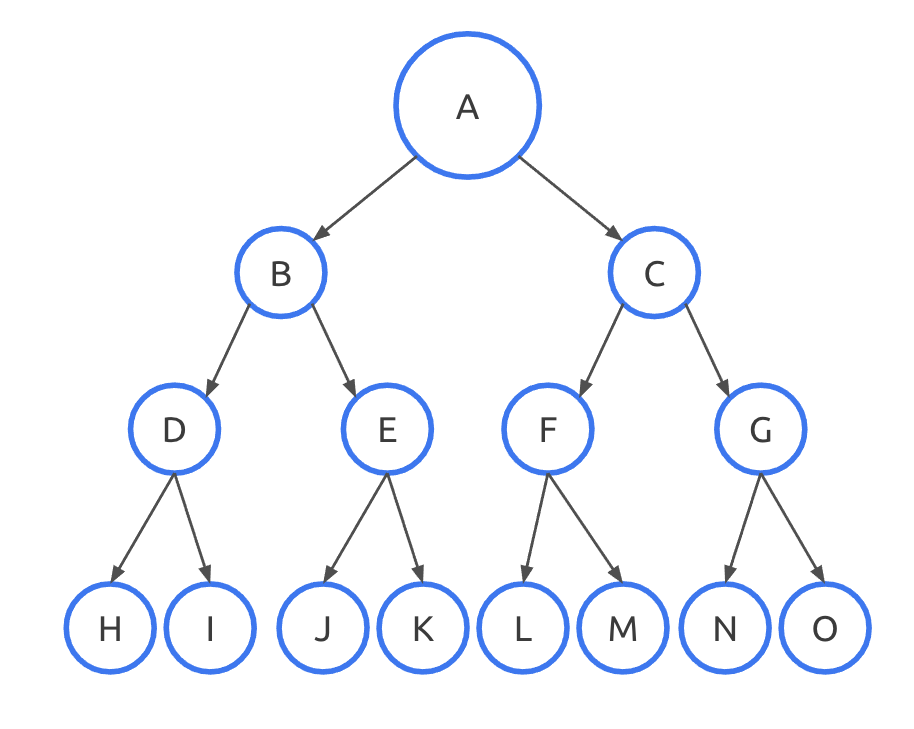

A depth-first search on this graph explores as far as possible along one pathway before backtracking. This means that it may traverse the graph in the following order, depending on your implementation:

$A \rightarrow B \rightarrow D \rightarrow H \rightarrow I \rightarrow E \rightarrow J \rightarrow K \rightarrow C \rightarrow F \rightarrow L \rightarrow M \rightarrow G \rightarrow N \rightarrow O$

Our search algorithm, in this example, is doing the following:

1. Explore as far as possible in one direction until we can go further (as no additional connections exist that we haven't seen).
1. Backtrack one node from where we stopped and attempt to explore as far as possible in one direction again until we cannot.
1. Repeat this pattern of exploring and backtracking until we have found the node we're looking for or explored every node in the graph.

A key insight to keep in mind is that in order to avoid looping forever, you also need to keep track of which nodes you've already visited. Otherwise, if the graph contains a cycle, you may just keep traversing that cycle infinitely.

Tìm kiếm theo chiều sâu trên đồ thị này duyệt xa nhất có thể dọc theo một đường đi trước khi quay lui. Điều này có nghĩa là nó có thể duyệt qua đồ thị theo thứ tự sau, tùy thuộc vào cách triển khai của bạn:

$A \rightarrow B \rightarrow D \rightarrow H \rightarrow I \rightarrow E \rightarrow J \rightarrow K \rightarrow C \rightarrow F \rightarrow L \rightarrow M \rightarrow G \rightarrow N \rightarrow O$

Thuật toán tìm kiếm của chúng ta trong ví dụ này thực hiện các bước như sau:

1. Duyệt xa nhất có thể theo một hướng cho đến khi không thể đi tiếp (vì không còn kết nối nào mà chúng ta chưa thấy).
2. Quay lại một nút từ nơi chúng ta dừng lại và cố gắng duyệt xa nhất có thể theo một hướng khác cho đến khi không thể tiếp tục.
3. Lặp lại mô hình duyệt và quay lại cho đến khi tìm thấy nút mà chúng ta đang tìm kiếm hoặc đã duyệt mọi nút trong đồ thị.

Một điểm quan trọng cần lưu ý là để tránh lặp vô hạn, bạn cũng cần theo dõi những nút nào đã được thăm. Nếu không, nếu đồ thị chứa chu trình, bạn có thể sẽ duyệt qua chu trình đó vô hạn.

### Implementation with recursion / Triển khai bằng đệ quy

As you might guess, given the emphasis on backtracking, depth-first search is typically implemented recursively.

Như bạn đoán, với sự nhấn mạnh vào việc quay lại/lui (backtracking), tìm kiếm theo chiều sâu thường được triển khai bằng đệ quy.

In [14]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

In [15]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

  def depth_first_search(self, node_name_to_find):
    if not self.node_list:
      return None
    # We choose an arbitrary node to start from.
    return self._dfs_helper(self.node_list[0], node_name_to_find, [])

  def _dfs_helper(self, start_node, node_name_to_find, visited_nodes):
    # Base case: If we've found the node, return it.
    if start_node.name == node_name_to_find:
      return start_node
    else:
      # Otherwise, mark the node as seen.
      visited_nodes.append(start_node)

      # Check the node's connections and if we haven't already seen it, call
      # _dfs_helper recursively on those nodes.
      for node in start_node.connected_to:
        if node in visited_nodes:
          continue
        else:
          if self._dfs_helper(node, node_name_to_find, visited_nodes):
            return node
    return None

With many recursive class methods, it's often best to define a helper method so that we can add addtional parameters, like the start node or the nodes that we've visited. Note that this implementation assumes that every node is reachable from the node that we started with. If that's not the case, then you would need to loop on `node in self.node_list` rather than just starting at `self.node_list[0]`.

Với nhiều phương thức lớp đệ quy, thường tốt nhất là định nghĩa một phương thức hỗ trợ (helper method) để có thể thêm các tham số bổ sung, như nút bắt đầu hoặc các nút đã được duyệt. Lưu ý rằng triển khai này giả định rằng mọi nút đều có thể truy cập được từ nút bắt đầu. Nếu không phải như vậy, bạn sẽ cần lặp qua `node in self.node_list` thay vì chỉ bắt đầu từ `self.node_list[0]`.


## Question 1

Which of the following statements about depth-first search are true?

Câu nào sau đây về thuật toán tìm kiếm theo chiều sâu là đúng?

**a)** Depth-first search uses recursion to visit nodes, so it runs in $O(\log{n})$ time where $n$ is the number of nodes in the graph.

**b)** Depth-first search needs to start at the node with the most connections in order to complete successfully.

**c)** A depth-first search from one node in the graph may not visit every other node in the graph, depending on how your graph is constructed.

**d)** Depth-first search needs to keep track of what nodes have already been seen, otherwise it may result in an infinite recursion.

**a)** Tìm kiếm theo chiều sâu sử dụng đệ quy để duyệt các nút, vì vậy nó chạy trong thời gian $O(\log{n})$ với $n$ là số lượng nút trong đồ thị.

**b)** Tìm kiếm theo chiều sâu cần bắt đầu từ nút có nhiều kết nối nhất để hoàn thành thành công.

**c)** Tìm kiếm theo chiều sâu từ một nút trong đồ thị có thể không duyệt qua tất cả các nút khác trong đồ thị, tùy thuộc vào cách đồ thị được xây dựng.

**d)** Tìm kiếm theo chiều sâu cần theo dõi các nút đã được duyệt, nếu không có thể dẫn đến đệ quy vô hạn.


### Solution

The correct answers are **c)** and **d)**.

**a)** While DFS does process nodes recursively, it still can potentially visit every node in the graph. As a result, it runs in linear time.

**b)** DFS traverses the graph and visits every node, so the start node is largely unimportant. If your graph is not fully connected, however, you need to make sure that you start a depth-first search from at least one node in each connected component.

Các câu trả lời đúng là **c)** và **d)**.

**a)** Mặc dù DFS xử lý các nút bằng đệ quy, nó vẫn có thể duyệt qua tất cả các nút trong đồ thị. Do đó, nó chạy trong thời gian tuyến tính.

**b)** DFS duyệt qua đồ thị và thăm mọi nút, vì vậy nút bắt đầu không quá quan trọng. Tuy nhiên, nếu đồ thị của bạn không được kết nối đầy đủ, bạn cần đảm bảo rằng bạn bắt đầu tìm kiếm theo chiều sâu từ ít nhất một nút trong mỗi thành phần liên thông.
